In [25]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("text_training.csv")
excluded_df = df.drop(['rating','ID'], axis=1)
excluded_df

,night,destroy,bottom,think,salmon,frequent,awesom,mill,suppli,discov,...,maker,whatev,substanc,factor,per,jug,remind,cooki,prevent,thing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
pca = PCA(n_components=2)
pca.fit(excluded_df)
pca.components_

array([[ 0.00096869,  0.00273422,  0.00403971, ...,  0.00206252,
         0.00117584,  0.02261877],
       [ 0.00486234,  0.01203377, -0.00707271, ..., -0.00098321,
        -0.00116803,  0.08340506]])

In [31]:
pca.explained_variance_ratio_

array([0.28029963, 0.03707786])

In [28]:
pca_df = pd.DataFrame(
    data=pca.components_.T,
    columns=["PC1", "PC2"]
)
pca_df

,PC1,PC2
0,0.000969,0.004862
1,0.002734,0.012034
2,0.004040,-0.007073
3,0.013817,0.012360
4,0.001783,0.002665
...,...,...
1995,-0.000064,-0.000304
1996,0.000500,-0.000902
1997,0.002063,-0.000983
1998,0.001176,-0.001168


In [29]:
pca_df["target"] = df["rating"]
pca_df

,PC1,PC2,target
0,0.000969,0.004862,0
1,0.002734,0.012034,1
2,0.004040,-0.007073,1
3,0.013817,0.012360,1
4,0.001783,0.002665,0
...,...,...,...
1995,-0.000064,-0.000304,0
1996,0.000500,-0.000902,0
1997,0.002063,-0.000983,0
1998,0.001176,-0.001168,0


Text(0.5, 1.0, 'temp')

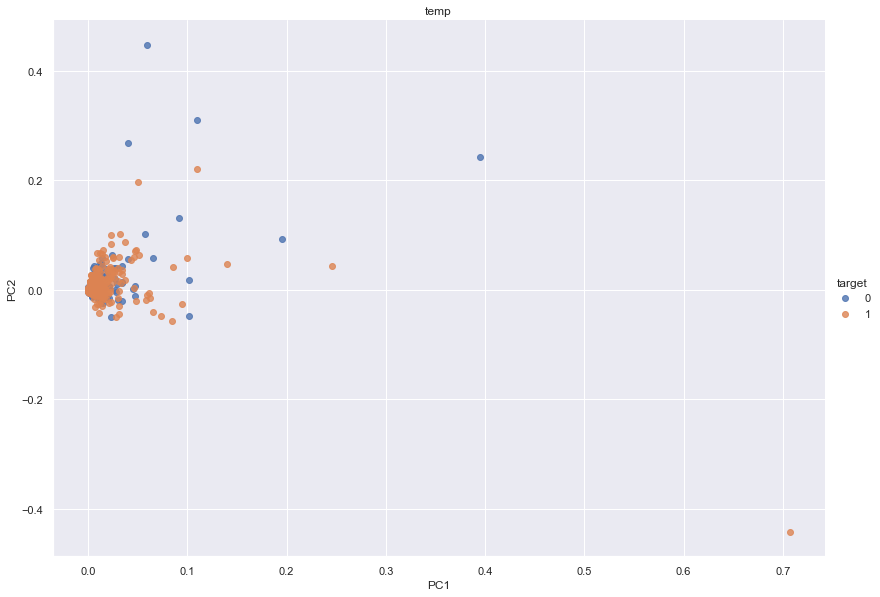

In [30]:
sns.set()
sns.lmplot(
    x="PC1",
    y="PC2",
    data=pca_df,
    hue="target",
    fit_reg=False,
    legend=True,
    height=8.27, aspect=11.7/8.27
)
plt.title("temp")
